In [1]:
import numpy as np
import pandas as pd
from os.path import join
from sklearn.model_selection import train_test_split
from tensorflow.python import keras
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, Conv2D, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras.preprocessing.image import load_img, img_to_array
import glob
from IPython.display import Image, display
import matplotlib.pyplot as plt
from tensorflow import keras
#from tensorflow.python.keras.applications.ResNet50 import preprocess_input
%matplotlib inline

In [1]:
import wget
!wget -O loan_train.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [3]:
img_dir='./question_1_dataset/train/'

In [25]:
total_imgs=len(glob.glob(img_dir+'/*.png'))
total_imgs

4465

In [4]:
fnames=['{}.png'.format(i) for i in range(1,total_imgs+1)]
len(fnames)

4465

In [5]:
img_paths=[join(img_dir,filename) for filename in fnames]

In [6]:
imgs=[load_img(img_path,target_size=(100,100)) for img_path in img_paths]

In [7]:
len(imgs)

4465

In [8]:
img_array = np.array([img_to_array(img) for img in imgs])
img_array=img_array/255

In [9]:
img_array.shape

(4465, 100, 100, 3)

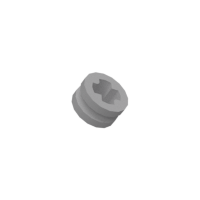

In [10]:
display(Image(img_paths[4464]))

In [11]:
from tensorflow.keras.utils import to_categorical
x=img_array
df=pd.read_csv('./question_1_dataset/train.csv')
y_out=np.array(df['category'])
y=to_categorical(y_out)
y=y[:,1:]

x_train,x_cv,y_train,y_cv=train_test_split(x,y,test_size=0.2,random_state=4)


In [12]:
data_generator_with_aug = ImageDataGenerator( horizontal_flip = True,
                                              width_shift_range = 0.1,
                                              height_shift_range = 0.1,validation_split=0.2)
            
data_generator_no_aug = ImageDataGenerator()


In [13]:
model=Sequential()
model.add(Conv2D(20,kernel_size=3,activation='relu',input_shape=(100,100,3)))
model.add(Conv2D(20,kernel_size=3,activation='relu'))
model.add(Conv2D(20,kernel_size=3,activation='relu'))
model.add(Flatten())
model.add(Dense(100,activation='relu'))
model.add(Dense(16,activation='softmax'))


In [14]:
image_size=100
i=0
#train_generator = data_generator_with_aug.flow_from_directory(
 #       './question_1_dataset/train/',target_size=(150,150),batch_size=32,class_mode='categorical'
  #      )
train_generator = data_generator_with_aug.flow(
        x_train,y_train,batch_size=100
        )



In [15]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit_generator(
        train_generator,
        epochs = 10,
        steps_per_epoch=30,validation_data=(x_cv,y_cv))

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
Train for 30 steps, validate on 893 samples
Epoch 1/10
30/30 [==============================] - 61s 2s/step - loss: 2.1919 - accuracy: 0.2554 - val_loss: 1.6302 - val_accuracy: 0.3483
Epoch 2/10
30/30 [==============================] - 64s 2s/step - loss: 1.5605 - accuracy: 0.4159 - val_loss: 1.2825 - val_accuracy: 0.4826
Epoch 3/10
30/30 [==============================] - 57s 2s/step - loss: 1.3921 - accuracy: 0.4613 - val_loss: 1.2134 - val_accuracy: 0.5196
Epoch 4/10
30/30 [==============================] - 60s 2s/step - loss: 1.2815 - accuracy: 0.5101 - val_loss: 1.2396 - val_accuracy: 0.5274
Epoch 5/10
30/30 [==============================] - 65s 2s/step - loss: 1.1840 - accuracy: 0.5575 - val_loss: 1.2171 - val_accuracy: 0.5039
Epoch 6/10
30/30 [==============================] - 62s 2s/step - loss: 1.1340 - accuracy: 0.5585 - val_loss: 1.2490 - val_accuracy: 0.5297
Epoch 7/10
30/3

In [18]:
yhat=model.predict(x_cv)
yhat=yhat.argmax(axis=1)+1
y_cv=y_cv.argmax(axis=1)+1



In [19]:
from sklearn.metrics import f1_score
f1_score(y_cv, yhat, average='weighted')


0.6361793174229131

In [29]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(x,y,batch_size=50,epochs=10,validation_split=0.2)

Train on 3572 samples, validate on 893 samples
Epoch 1/10
3572/3572 [==============================] - 74s 21ms/sample - loss: 0.5833 - accuracy: 0.7802 - val_loss: 0.5275 - val_accuracy: 0.7940
Epoch 2/10
3572/3572 [==============================] - 69s 19ms/sample - loss: 0.2265 - accuracy: 0.9132 - val_loss: 0.5491 - val_accuracy: 0.8175
Epoch 3/10
3572/3572 [==============================] - 64s 18ms/sample - loss: 0.1390 - accuracy: 0.9426 - val_loss: 0.5921 - val_accuracy: 0.8108
Epoch 4/10
3572/3572 [==============================] - 63s 18ms/sample - loss: 0.0896 - accuracy: 0.9647 - val_loss: 0.6058 - val_accuracy: 0.8029
Epoch 5/10
3572/3572 [==============================] - 81s 23ms/sample - loss: 0.0579 - accuracy: 0.9748 - val_loss: 0.5090 - val_accuracy: 0.8387
Epoch 6/10
3572/3572 [==============================] - 78s 22ms/sample - loss: 0.0501 - accuracy: 0.9798 - val_loss: 0.5408 - val_accuracy: 0.8264
Epoch 7/10
3572/3572 [==============================] - 77s 22ms/

In [34]:

yhat=model.predict(x)
yhat=yhat.argmax(axis=1)+1

from sklearn.metrics import f1_score
f1_score(y_out, yhat, average='weighted')

0.9636753030440856

In [26]:

img_dir_test='./question_1_dataset/test/'
total_imgs_test=len(glob.glob(img_dir_test+'/*.png'))
fnames_test=['{}.png'.format(i) for i in range(total_imgs+1,total_imgs+total_imgs_test+1)]
img_paths_test=[join(img_dir_test,filename) for filename in fnames_test]
imgs_test=[load_img(img_path_test,target_size=(100,100)) for img_path_test in img_paths_test]
img_array_test = np.array([img_to_array(img) for img in imgs_test])
img_array_test=img_array_test/255



In [32]:
x_test=img_array_test
yhat_test=model.predict(x_test)
yhat_test=yhat_test.argmax(axis=1)+1


In [37]:
y_final=np.hstack([yhat,yhat_test])
y_final.shape

(6379,)

In [50]:
import csv

In [67]:
with open("./question_1_dataset/Testfinal.csv","w") as file:
    writer=csv.writer(file)
    for i in range(total_imgs):
        writer.writerow([fnames[i],yhat[i]])
    for i in range(total_imgs_test):
        writer.writerow([fnames_test[i],yhat_test[i]])


In [68]:
df=pd.read_csv('./question_1_dataset/Testfinal.csv')

In [65]:
df

,1.png,9
0,2.png,3
1,3.png,9
2,4.png,8
3,5.png,13
4,6.png,7
...,...,...
6373,6375.png,8
6374,6376.png,13
6375,6377.png,7
6376,6378.png,3


In [1]:
'my change'

'my change'

In [2]:
'another change'

'another change'